In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma
from scipy.stats import norm, t, skew, kurtosis
from statsmodels.tsa.stattools import adfuller

In [2]:
results = pd.read_csv('../results.csv')
results

,Model,Distribution,Omega,Alpha,Beta,Log_Likelihood,AIC,Train_Time,MSE,MAE,HMSE,Gamma,Phi,Nu
0,GARCH,normal,4.097393e-01,0.092650,0.881172,-3813.586909,7633.173819,0.890260,13.779651,2.747854,0.416289,NaN,NaN,NaN
1,GARCH,t,8.988581e-07,0.044090,0.955910,-3616.911096,7241.822192,0.044575,6.315838,1.979087,0.183586,NaN,NaN,3.386998
2,GARCH,laplace,1.726342e-01,0.060626,0.922887,-3616.224455,7238.448910,0.015690,6.845059,1.940059,0.175479,NaN,NaN,NaN
3,GARCH,ged,2.502281e-01,0.060577,0.911082,-3686.033005,7378.066009,0.000000,9.109568,2.162834,0.207638,NaN,NaN,NaN
4,EGARCH,normal,1.270607e-01,0.167251,0.954814,-3805.394698,7618.789396,0.297649,12.401062,2.719046,0.477687,-0.049626,NaN,NaN
5,EGARCH,t,2.259624e-02,0.127295,0.989609,-3605.475830,7220.951659,0.062976,5.564425,2.110217,0.238713,0.007580,NaN,3.500287
6,EGARCH,laplace,6.522833e-02,0.117603,0.986093,-3609.326273,7226.652546,0.301527,9.152662,2.333403,0.300020,0.005478,NaN,NaN
7,EGARCH,ged,8.561952e-02,0.119971,0.976181,-3678.158025,7364.316050,0.019275,10.542728,2.403159,0.329225,-0.010223,NaN,NaN
8,GJR-GARCH,normal,5.484515e-01,0.065723,0.860386,-3807.507066,7623.014132,0.237928,14.633752,2.824724,0.525895,0.081321,NaN,NaN
9,GJR-GARCH,t,7.644391e-06,0.044037,0.961525,-3614.947488,7239.894975,0.044600,5.224131,1.733749,0.147224,-0.011126,NaN,3.352640


In [3]:
asset = 'BTC'
returns_df = pd.read_csv('../data/daily_returns.csv', index_col=0, parse_dates=True)
residuals_df = pd.read_csv('../data/daily_residuals.csv', index_col=0, parse_dates=True)
realized_vars_df = pd.read_csv('../data/daily_realized_vars.csv', index_col=0, parse_dates=True)
cvx_df = pd.read_csv('../data/daily_cvx.csv', index_col=0, parse_dates=True)

common_idx = realized_vars_df.index.intersection(cvx_df.index)
returns = returns_df[asset].loc[common_idx]
residuals = residuals_df[asset].loc[common_idx]
realized_vars = realized_vars_df[asset].loc[common_idx]
cvx = cvx_df['CVX'].loc[common_idx]

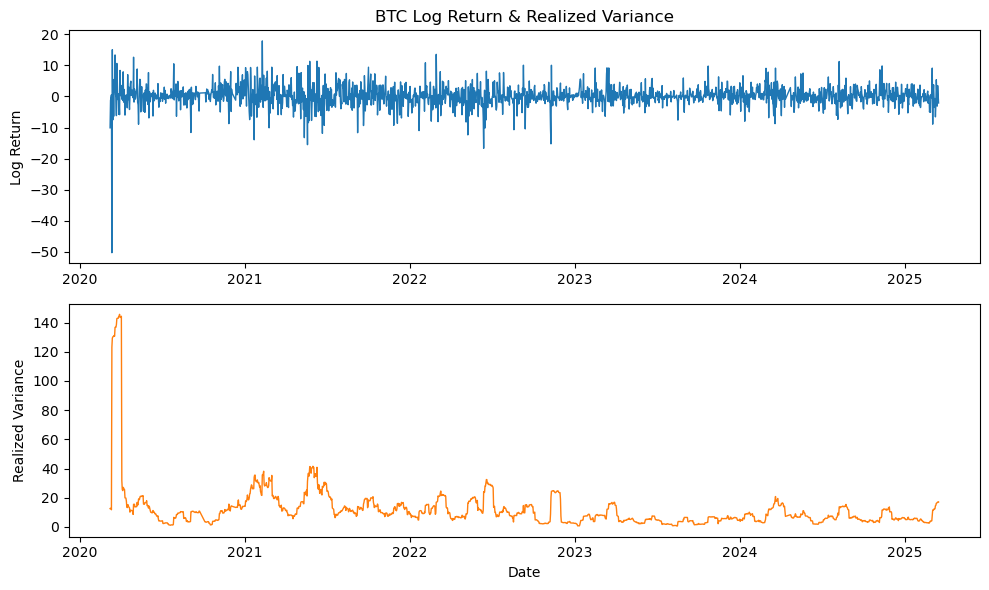

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False, gridspec_kw={'height_ratios': [1, 1]})

ax1.plot(returns.index, returns, linewidth=1, color='tab:blue')
ax1.set_ylabel('Log Return')
ax1.set_title('BTC Log Return & Realized Variance')

ax2.plot(realized_vars.index, realized_vars, linewidth=1, color='tab:orange')
ax2.set_xlabel('Date')
ax2.set_ylabel('Realized Variance')

plt.tight_layout()
plt.show()

c:\Users\minse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


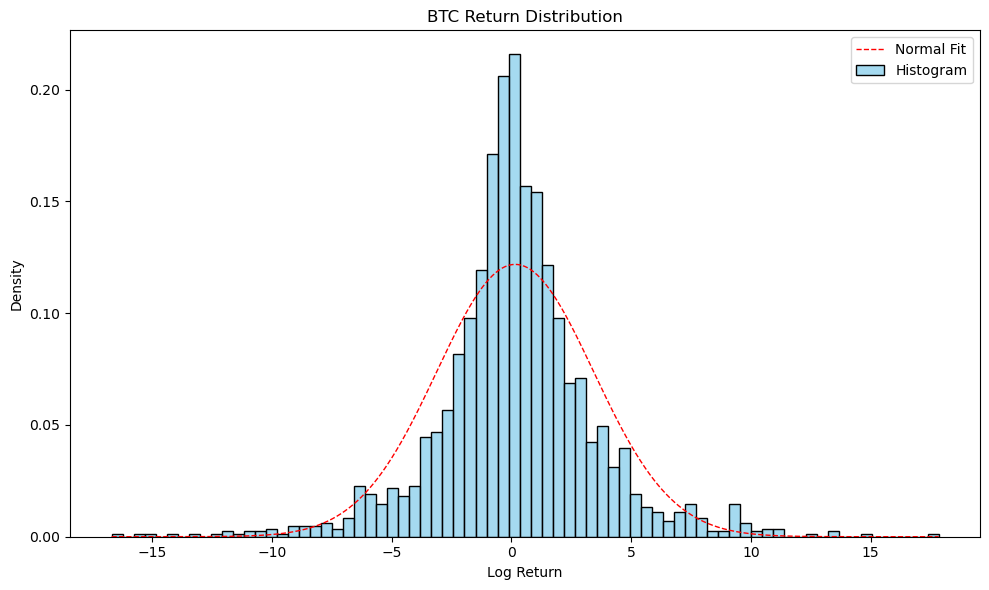

In [5]:
ret = returns.dropna()
ret = ret[(ret > -25) & (ret < 25)]

mu, std = norm.fit(ret)
x = np.linspace(ret.min(), ret.max(), 1000)
pdf = norm.pdf(x, mu, std)

plt.figure(figsize=(10, 6))
sns.histplot(ret, bins=75, stat='density', color='skyblue', label='Histogram', linewidth=1)
plt.plot(x, pdf, 'r--', linewidth=1, label=f'Normal Fit')
plt.title('BTC Return Distribution')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
returns.max(), returns.min(), returns.mean(), returns.std(), returns.skew(), returns.kurtosis()

(17.844855970428288,
 -50.26069427414592,
 0.12848507542829896,
 3.4828121649781725,
 -1.6653517028000417,
 26.393962825121907)

In [7]:
result = adfuller(returns)
result

(-14.31019780628327,
 1.1879014670048577e-26,
 8,
 1793,
 {'1%': -3.434002362895342,
  '5%': -2.863153315036348,
  '10%': -2.5676288771043367},
 9186.836607010879)

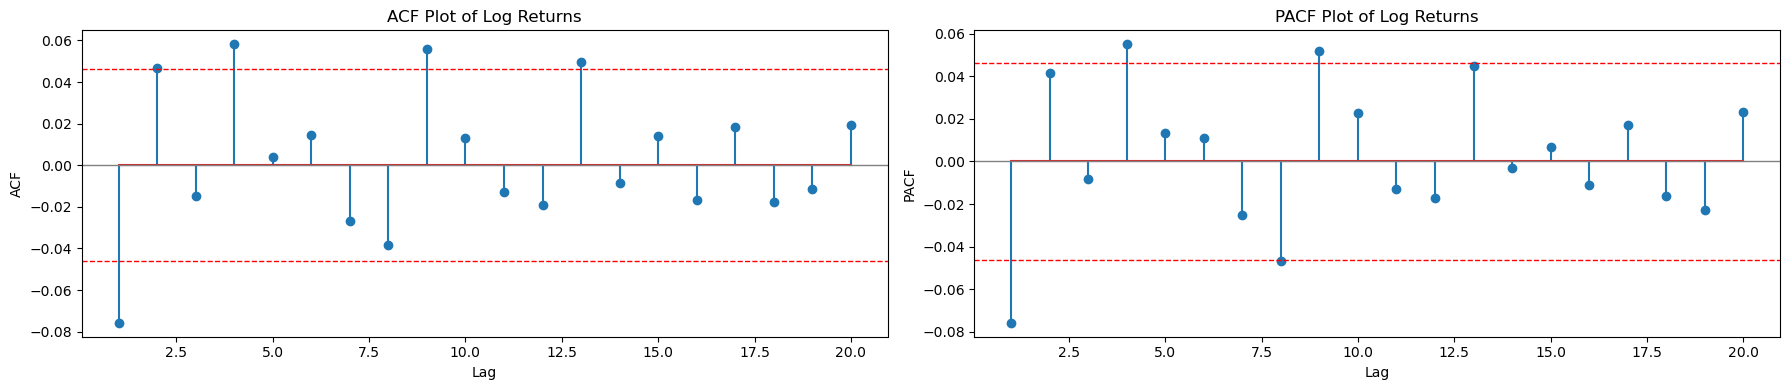

In [8]:
from statsmodels.tsa.stattools import acf, pacf

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
axes = axes.flatten()

acf_returns = acf(returns, nlags=20)
acf_residuals = acf(residuals, nlags=20)
pacf_returns = pacf(returns, nlags=20)
pacf_residuals = pacf(residuals, nlags=20)

axes[0].stem(range(1, len(acf_returns)), acf_returns[1:])
axes[0].axhline(0, color='gray', linewidth=1)
axes[0].axhline(1.96/len(returns)**0.5, color='red', linestyle='--', linewidth=1)
axes[0].axhline(-1.96/len(returns)**0.5, color='red', linestyle='--', linewidth=1)
axes[0].set_title(f'ACF Plot of Log Returns')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

axes[1].stem(range(1, len(pacf_returns)), pacf_returns[1:])
axes[1].axhline(0, color='gray', linewidth=1)
axes[1].axhline(1.96/len(returns)**0.5, color='red', linestyle='--', linewidth=1)
axes[1].axhline(-1.96/len(returns)**0.5, color='red', linestyle='--', linewidth=1)
axes[1].set_title(f'PACF Plot of Log Returns')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')
    
plt.tight_layout()
plt.show()

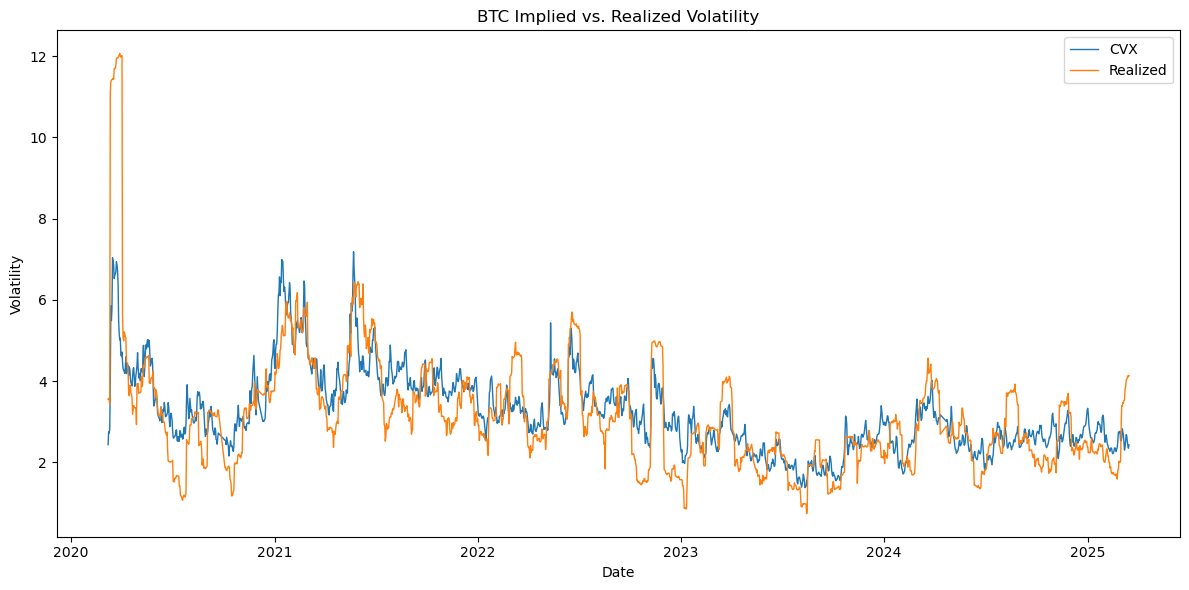

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(cvx.index, cvx, label='CVX', linewidth=1)
plt.plot(realized_vars.index, np.sqrt(realized_vars), label='Realized', linewidth=1)
plt.title('BTC Implied vs. Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
realized_vols = np.sqrt(realized_vars)
np.corrcoef(realized_vols.shift(1).dropna(), cvx[:-1])

array([[1.       , 0.7748152],
       [0.7748152, 1.       ]])

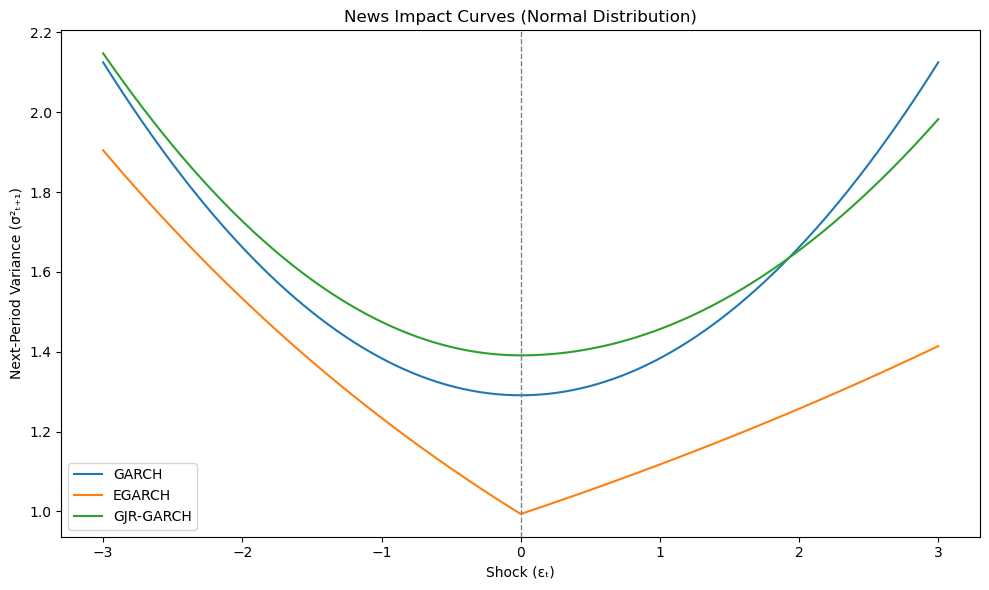

In [9]:
epsilon_vals = np.linspace(-3, 3, 500)
sigma_t2 = 1.0 

omega_garch = 0.4097939
alpha_garch = 0.092650
beta_garch = 0.881172
nic_garch = omega_garch + alpha_garch * epsilon_vals**2 + beta_garch * sigma_t2

omega_egarch = 0.1270607
alpha_egarch = 0.167251
gamma_egarch = -0.049626
beta_egarch = 0.954814
nic_egarch_log = omega_egarch + beta_egarch * np.log(sigma_t2) + alpha_egarch * (np.abs(epsilon_vals) - np.sqrt(2 / np.pi)) + gamma_egarch * epsilon_vals
nic_egarch = np.exp(nic_egarch_log)

omega_gjr = 0.584515
alpha_gjr = 0.065723
beta_gjr = 0.806386
gamma_gjr = 0.018321
indicator = (epsilon_vals < 0).astype(float)
nic_gjr = omega_gjr + alpha_gjr * epsilon_vals**2 + gamma_gjr * epsilon_vals**2 * indicator + beta_gjr * sigma_t2

plt.figure(figsize=(10, 6))
plt.plot(epsilon_vals, nic_garch, label='GARCH', linewidth=1.5)
plt.plot(epsilon_vals, nic_egarch, label='EGARCH', linewidth=1.5)
plt.plot(epsilon_vals, nic_gjr, label='GJR-GARCH', linewidth=1.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.title('News Impact Curves (Normal Distribution)')
plt.xlabel('Shock (εₜ)')
plt.ylabel('Next-Period Variance (σ²ₜ₊₁)')
plt.legend()
plt.tight_layout()
plt.show()
